In [44]:
import pandas as pd
import numpy as np
import seaborn as sn
import random as rd
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Data exploration 

In [45]:
X = pd.read_csv('X_train.csv')

In [46]:
X.head()

,x1,x2,x3,x4,x5,x6
0,1.207981,0.084499,1.459217,0.007140,0.102074,1.0
1,0.761218,0.725109,0.579453,0.525783,0.551966,1.0
2,0.552562,0.519373,0.305325,0.269748,0.286986,1.0
3,-0.582708,0.267048,0.339548,0.071315,-0.155611,1.0
4,2.102288,1.633871,4.419616,2.669534,3.434868,1.0


In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 6 columns):
x1    826 non-null float64
x2    826 non-null float64
x3    826 non-null float64
x4    826 non-null float64
x5    826 non-null float64
x6    826 non-null float64
dtypes: float64(6)
memory usage: 38.8 KB


In [48]:
y = pd.read_csv('y_train.csv')

In [49]:
y[:4]

,y
0,1
1,1
2,1
3,1


In [50]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 1 columns):
y    826 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB


# To convert the target data frame to an array 

In [51]:
y=y.values

In [52]:
y[:4]

array([[1],
       [1],
       [1],
       [1]])

In [53]:
# fig = plt.figure(figsize=(8,6))
# plt.scatter(X[:,0], X[:,1], c=y)
# plt.show()

# Splitting the data set into train data and test data set

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [56]:
X_train.shape

(578, 6)

# Logistic regression model

In [57]:
class LogisticRegression ():
    
    def __init__(self) :
        
        pass
    
    def sigmoid(self , z):
        
        self.sigmo= 1/(1+np.exp(-z))
        
        return self.sigmo
    
    def cost_function (self, x, y, y_true):
       

        self.cost = -(1/ x.shape[0]) * np.sum(y_true * np.log(y) + (1-y_true) * np.log(1- y))
        
        return self.cost
    
    def learning_algorithm(self, x, y_true, learning_rate, n_iteration) :
        
        m_samples, n_features = x.shape
        self.theta = np.zeros((n_features , 1))
        self.bias = 0
        cost_final= np.zeros(n_iteration)
        
        for i in range(n_iteration):
            
            y_hat = self.sigmoid(np.dot(x, self.theta) + self.bias)

            cost = self.cost_function(x, y_hat, y_true)
            
            d_theta = (1 / m_samples) * np.dot(x.T, (y_hat - y_true))
            d_bias = (1 / m_samples) * np.sum(y_hat - y_true)

            self.theta = self.theta - learning_rate * d_theta 
            self.bias = self.bias - learning_rate * d_bias
        
            cost_final[i] = cost
            
            
        return self.theta, self.bias, cost_final
        
        
    def prediction (self, X):
        
        y_hat = self.sigmoid ( np.dot(X, self.theta) + self.bias)
        
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_hat]
        
        
        return y_predict_labels

In [58]:
logistic_reg = LogisticRegression()

here we show the curve of the cost function

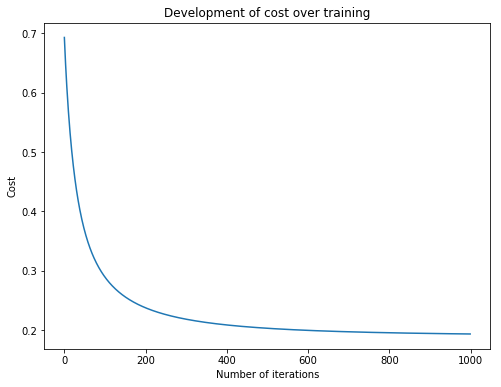

In [59]:
logistic_reg = LogisticRegression()
theta, bias, costs = logistic_reg.learning_algorithm(X_train, y_train, learning_rate=0.1, n_iteration=1000)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange (1000), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

We can check that this curve looks like decreasing but it is stationnary somewhere when the number of iteration becomes very large. That's the convergence of the cost function.

In [60]:
gr_descent=logistic_reg.learning_algorithm(X_train, y_train, learning_rate=0.1, n_iteration=1000)


y_predict=logistic_reg.prediction(X_test)

accuracy=0
for i in range(len(y_predict)):
    if y_predict[i]==y_test[i]:
        accuracy+= 1
    
accuracy/= len(y_predict)
print('the accuracy is {} %'.format(np.round(accuracy*100, 2)))

the accuracy is 89.92 %
